# SPAM MAIL DETECTION

## UPLOADING DATASET

In [4]:
from google.colab import files
uploaded = files.upload()



Saving spambase.csv to spambase.csv


## IMPORTING LIBRARIES

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt


In [8]:
import io

In [9]:
import seaborn as sns

## PREPROCESSING THE DATASET

In [10]:
df = pd.read_csv(io.BytesIO(uploaded['spambase.csv']))

In [11]:
# Drop or fill missing values if necessary
df = df.dropna()  # or use df.fillna() for filling missing values


In [12]:
X = df.drop('class', axis=1)

In [13]:
Y = df['class']

## NORMALIZING THE DATA


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## SPLITTING INTO SETS

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


## TRAINING THE MODEL

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## EVALUATING THE MODEL

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, y_pred)


In [19]:
cm = confusion_matrix(y_test, y_pred)


In [20]:
report = classification_report(y_test, y_pred)


In [21]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9196525515743756
Confusion Matrix:
[[506  25]
 [ 49 341]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



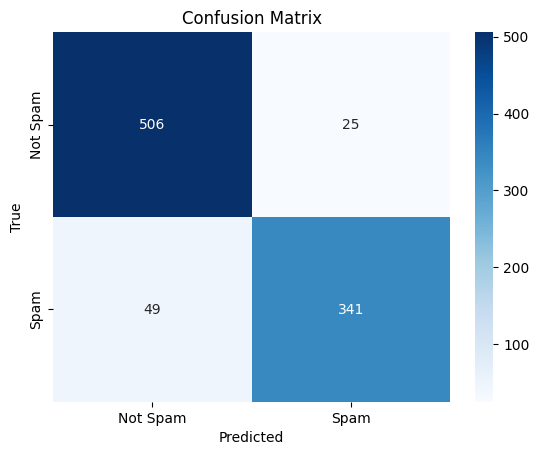

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


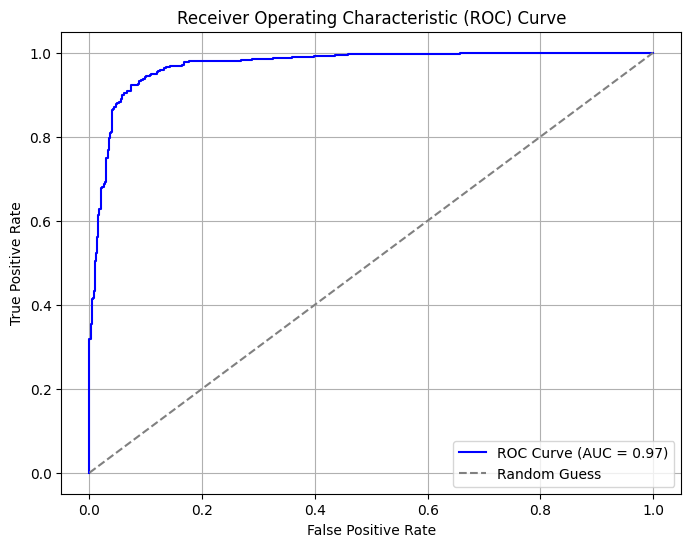

In [27]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


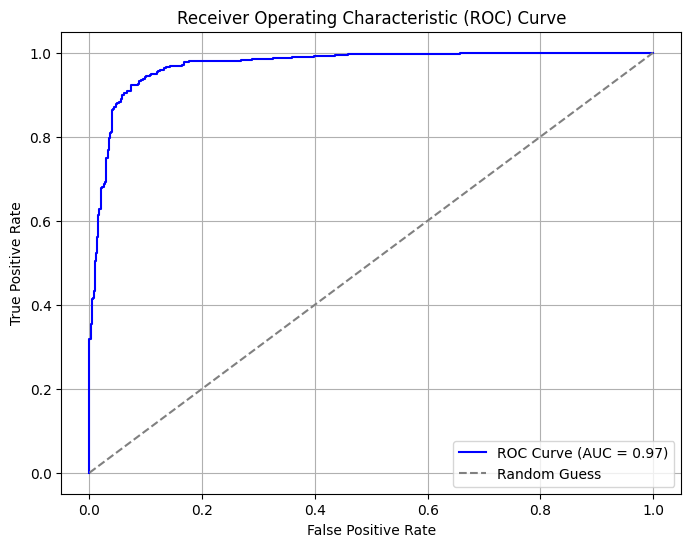

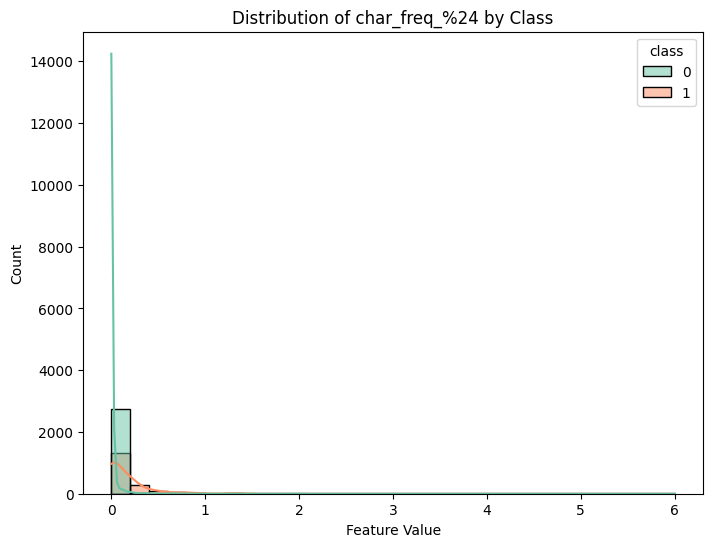

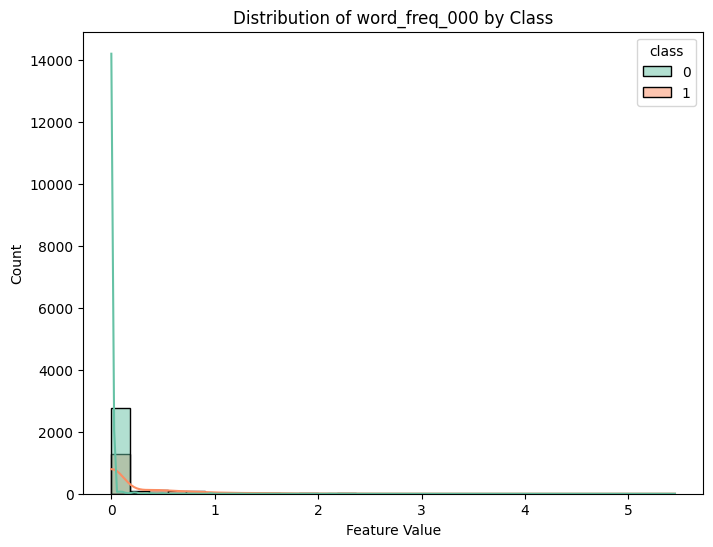

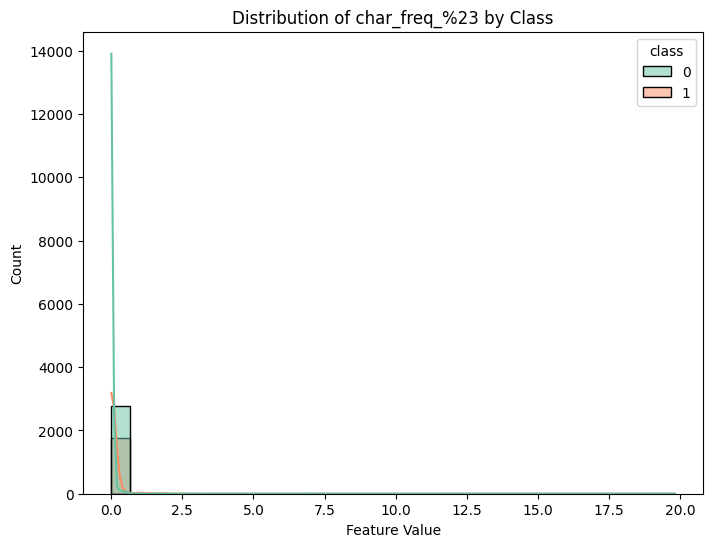

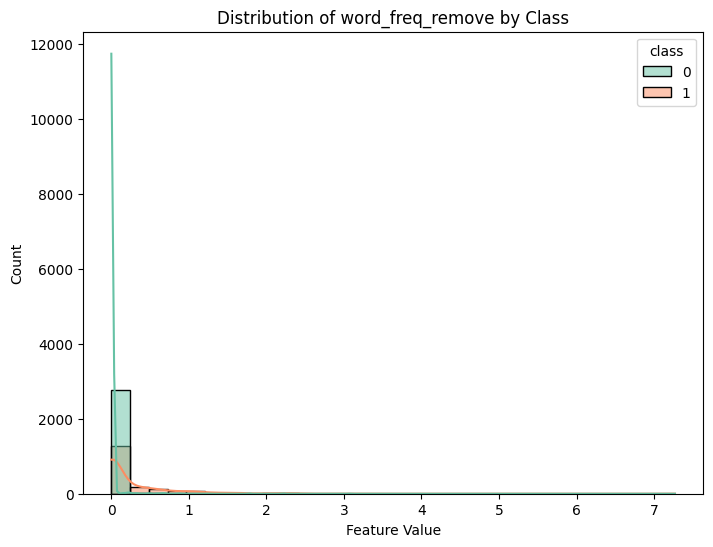

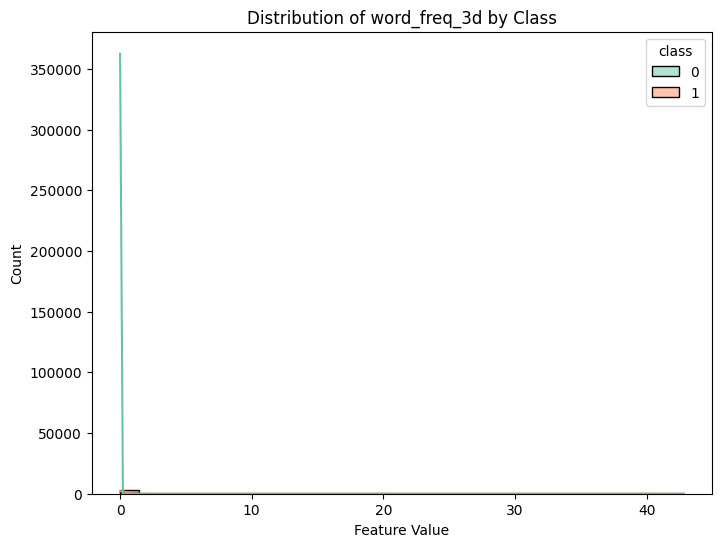

In [34]:
# Ensure importance_df exists and is correctly defined
importance_df = pd.DataFrame({
    'Feature': df.drop('class', axis=1).columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Get the top 5 features
top_features = importance_df.head(5)['Feature']

# Define top features
top_features = importance_df.head(5)['Feature']

# Plot distributions using histograms with KDE
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df, x=feature, hue='class', kde=True, palette='Set2', bins=30)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Feature Value')
    plt.ylabel('Count')
    plt.show()

